# Generate BEL2ABM Figure

This notebook presents the results of the replicates of the BEL2ABM simulation of amyloid beta processing.

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import time

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
print(sys.version)

3.6.3 (default, Oct  9 2017, 09:47:56) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


In [4]:
print(time.asctime())

Tue Nov 28 14:19:50 2017


## Load Data

In [5]:
results_folder = os.path.join(os.path.expanduser('~'), 'Desktop', 'SORLA', 'spartan_runs_no_replicates',)

The control data is loaded from the `wo_SORLA_22secr` folder, signifying that no SORLA was added in the experiments.

In [6]:
clean_run = pd.read_csv(
    os.path.join(results_folder, 'wo_SORLA_22secr', 'results.tsv'),
    sep='\t'
)
clean_run

,mean_sappa_values,mean_sappad_values,sappa_sums,mean_sappb_values,mean_sappbd_values,sappb_sums
10,2.177945,0.140351,2.318296,0.255639,0.002506,0.258145
20,3.781955,0.533835,4.315789,0.355890,0.042607,0.398496
50,6.498747,2.516291,9.015038,0.744361,0.265664,1.010025
100,8.957393,6.894737,15.852130,1.022556,0.621554,1.644110
200,12.428571,16.586466,29.015038,1.273183,1.503759,2.776942
300,13.839599,26.303258,40.142857,1.446115,2.423559,3.869674
400,15.375940,33.568922,48.944862,1.568922,3.315789,4.884712
500,16.476190,39.591479,56.067669,1.736842,3.944862,5.681704
600,17.606516,43.786967,61.393484,1.857143,4.278195,6.135338


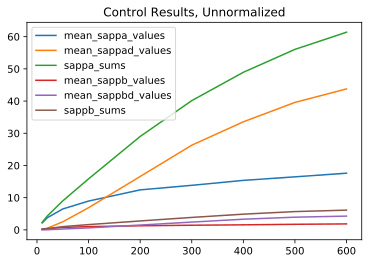

In [7]:
clean_run.plot.line()
plt.title('Control Results, Unnormalized')
plt.show()

The perturbation data is loaded from the `with_3300SORLA_22secr` folder, signifying that SORLA was added to the experiments.

In [8]:
sorla_run = pd.read_csv(
    os.path.join(results_folder, 'with_3300SORLA_22secr', 'results.tsv'),
    sep='\t'
)
sorla_run

,mean_sappa_values,mean_sappad_values,sappa_sums,mean_sappb_values,mean_sappbd_values,sappb_sums
10,0.017544,0.000000,0.017544,0.005013,0.000000,0.005013
20,0.037594,0.002506,0.040100,0.002506,0.000000,0.002506
50,0.152882,0.025063,0.177945,0.010025,0.000000,0.010025
100,0.265664,0.095238,0.360902,0.010025,0.007519,0.017544
200,0.598997,0.418546,1.017544,0.070175,0.040100,0.110276
300,0.857143,0.779449,1.636591,0.105263,0.072682,0.177945
400,1.355890,1.411028,2.766917,0.137845,0.117794,0.255639
500,1.839599,2.240602,4.080201,0.223058,0.215539,0.438596
600,2.368421,3.208020,5.576441,0.238095,0.270677,0.508772


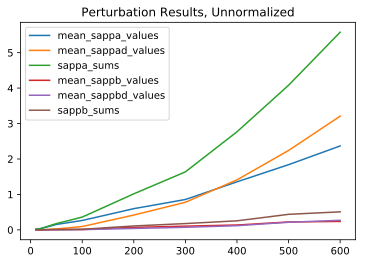

In [9]:
sorla_run.plot.line()
plt.title('Perturbation Results, Unnormalized')
plt.show()

## Visualization

Multiple different plots are produced to show different aspects of the experiments.

From this chart, I conclude that the sAPPa monomer levels change about the same in the context of SORLA, but the introduction of SORLA has a big effect on lessening the formation of the dimer.  

These plots are split by sAPPa and sAPPb to investigate the effects of the experiment.

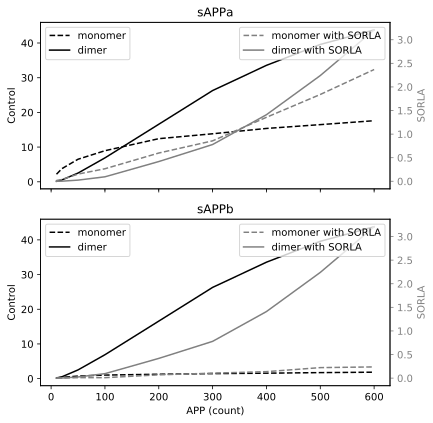

In [10]:
fix, ax = plt.subplots(2, figsize=(6, 6))

ax01 = ax[0]
ax01.set_title('sAPPa')
clean_run['mean_sappa_values'].plot.line(ax=ax01, color='black', linestyle='--', label='monomer')
clean_run['mean_sappad_values'].plot.line(ax=ax01, color='black', label='dimer')
ax01.set_xlabel('APP (count)')
ax01.set_ylabel('Control', color='black')
ax01.tick_params('y', colors='black')
ax01.legend()

ax02 = ax01.twinx()
sorla_run['mean_sappa_values'].plot.line(ax=ax02, color='gray', linestyle='--', label='monomer with SORLA')
sorla_run['mean_sappad_values'].plot.line(ax=ax02, color='gray', label='dimer with SORLA')
ax02.set_ylabel('SORLA', color='gray')
ax02.tick_params('y', colors='gray')
ax02.legend(loc=1)

ax11 = ax[1]
ax11.set_title('sAPPb')
clean_run['mean_sappb_values'].plot.line(ax=ax11, color='black', linestyle='--', label='monomer')
clean_run['mean_sappad_values'].plot.line(ax=ax11, color='black', label='dimer' )
ax11.set_xlabel('APP (count)')
ax11.set_ylabel('Control', color='black')
ax11.tick_params('y', colors='black')
ax11.legend()

ax12 = ax11.twinx()
sorla_run['mean_sappb_values'].plot.line(ax=ax12, color='gray', linestyle='--', legend=False, label='momoner with SORLA')
sorla_run['mean_sappad_values'].plot.line(ax=ax12, color='gray', legend=False, label='dimer with SORLA')
ax12.set_ylabel('SORLA', color='gray')
ax12.tick_params('y', colors='gray')
ax12.legend(loc=1)

plt.tight_layout()
plt.savefig('/Users/cthoyt/Desktop/sappb.png', dpi=300)
plt.show()

These plots are split by control and perturbation by SORLA to investigate the effects of the experiment.

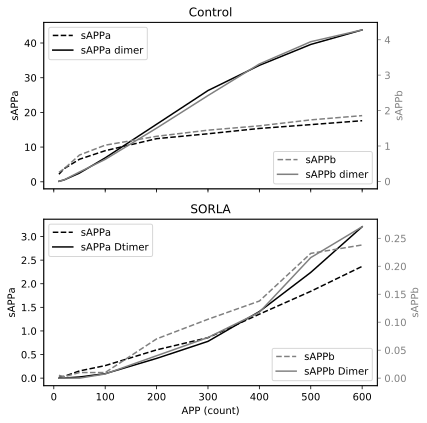

In [11]:
fix, ax = plt.subplots(2, figsize=(6, 6))

ax01 = ax[0]
ax01.set_title('Control')
clean_run['mean_sappa_values'].plot.line(ax=ax01, color='black', linestyle='--', label='sAPPa')
clean_run['mean_sappad_values'].plot.line(ax=ax01, color='black', label='sAPPa dimer')
ax01.set_xlabel('APP (count)')
ax01.set_ylabel('sAPPa', color='black')
ax01.tick_params('y', colors='black')

ax01.legend()

ax02 = ax01.twinx()
clean_run['mean_sappb_values'].plot.line(ax=ax02, color='grey', linestyle='--', label='sAPPb')
clean_run['mean_sappbd_values'].plot.line(ax=ax02, color='grey', label='sAPPb dimer' )
ax02.set_ylabel('sAPPb', color='gray')
ax02.tick_params('y', colors='gray')
ax02.legend(loc=4)

ax11 = ax[1]
ax11.set_title('SORLA')
sorla_run['mean_sappa_values'].plot.line(ax=ax11, color='black', linestyle='--', label='sAPPa')
sorla_run['mean_sappad_values'].plot.line(ax=ax11, color='black', label='sAPPa Dimer')
ax11.set_xlabel('APP (count)')
ax11.set_ylabel('sAPPa', color='black')
ax11.tick_params('y', colors='black')
ax11.legend()

ax12 = ax11.twinx()
sorla_run['mean_sappb_values'].plot.line(ax=ax12, color='gray', linestyle='--', legend=False, label='sAPPb')
sorla_run['mean_sappbd_values'].plot.line(ax=ax12, color='gray', legend=False, label='sAPPb Dimer')
ax12.set_ylabel('sAPPb', color='gray')
ax12.tick_params('y', colors='gray')
ax12.legend(loc=4)

plt.tight_layout()
plt.savefig('/Users/cthoyt/Desktop/figure1.png', dpi=300)
plt.savefig('/Users/cthoyt/Desktop/figure1.eps')
plt.show()